# Portfolio Theory and Risk Aversion Analysis

This notebook explores key concepts in portfolio theory and risk aversion using both analytical and numerical methods. It covers:

- Calculation of certainty equivalents and risk premiums under different utility functions (logarithmic and power utility).
- Analytical derivations and Taylor series approximations for risk premium.
- Discussion of risk aversion coefficients and their implications for investor behavior.
- Downloading and analyzing historical stock data to compute returns, covariances, and construct the efficient frontier.
- Implementation of quadratic programming to solve for optimal portfolio weights under various risk-return preferences.
- Examination of diversification effects and the impact of correlation on portfolio risk.

The notebook combines theoretical explanations with practical Python code to provide a comprehensive understanding of modern portfolio theory.

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_
import yfinance as yf

### Question 1.

$W_{0}$ = 1000
<br>
-150 with prob. p=1/2
<br>
+150 with prob. q=1/2
<br>
U(W)=ln(W)

### a.
#### Certainty Equivalent
E[U(W)] = U(CE)
<br>
$e^{U(CE)}$ = $e^{ln(CE)}$ = CE
<br>
CE = $988.68

#### Risk Premium
RP = E($W_{t}$)-CE
<br>
RP = $11.31

#### Taylor Series Expansion
Risk Premium is approximated by y is about equal to volatility*A($W*_{T}$)/2 with  A($W*_{T}$) = -U"($W*_{T}$) / U'($W*_{T}$) 
<br>
A($W*_{T}$) = -1/$W*_{T}$ where $W*_{T}$ = 1000 so A($W*_{T}$) = 1/1000. Volatility = E(($W_{T}$-E($W_{T}$)$)^{2}$) = 1/2*(850-1000$)^{2}$ + 1/2*(1150-1000$)^{2}$ = 22500. This approximates the risk premium to 22500/2000 = 11.25 which is close to 11.31

In [4]:
#E[U(W)]
W_0=1000
z_1 = 150
z_2 = 150
p=1/2
q=1/2
def calc_expected_utility (W_0,z_1,z_2,p,q):
    U_1 = math.log(W_0-z_1)
    U_2 = math.log(W_0+z_2)
    expected_utility = p*U_1+q*U_2
    return expected_utility
exp_util = calc_expected_utility(W_0,z_1,z_2,p,q)
print("Expected Utility = "+ str(exp_util))

Expected Utility = 6.896376785420829


In [5]:
#U(CE)
def calc_certainty_equivalent(exp_util):
    CE=math.exp(exp_util)
    return CE
cert_equiv = calc_certainty_equivalent(exp_util)
print("Certainty Equivalent = "+ str(cert_equiv))

Certainty Equivalent = 988.6859966642594


In [6]:
#RP 
def calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv):
    expected_wealth = p*(W_0-z_1)+q*(W_0+z_2)
    RP=expected_wealth - cert_equiv
    return RP
RP = calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv)
print("Risk Premium = " +str(RP))

Risk Premium = 11.314003335740608


In [7]:
#volatility
volatility = p*((-z_1)**2)+q*(z_2**2)
print("Volatility = " +str(volatility))

Volatility = 22500.0


### b. 
$W_{0}$ = 2000
<br>
RP = $5.63 
<br> This makes sense since RP should decrease as wealth increases

In [8]:
W_0 = 2000
exp_util = calc_expected_utility(W_0,z_1,z_2,p,q)
cert_equiv = calc_certainty_equivalent(exp_util)
RP = calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv)
print("Risk Premium = " +str(RP))

Risk Premium = 5.632932482087199


### c.
$W_{0}$ = 1000
<br>
-300 with prob. p = 1/2
<br>
+300 with prob. q = 1/2
<br>
RP = $46.06 
<br>
This makes sense since RP should increase since there is a higher volatility

In [9]:
W_0 = 1000
z_1 = 300
z_2 = 300
exp_util = calc_expected_utility(W_0,z_1,z_2,p,q)
cert_equiv = calc_certainty_equivalent(exp_util)
RP = calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv)
print("Risk Premium = " +str(RP))

Risk Premium = 46.060798583054975


### Question 2
$W_{0}$ = 1000
<br> 
-400 with prob. p = 1/3
<br>
+250 with prob. q = 2/3
<br>
U(W) = $W^{k}$ where k is a real number
<br> <br>

If we assume that there is an equal probability to lose/gain the same amount of money. We have 3 scenarios, if k = 1 then the investor is neutral towards risk, meaning that the utility fluctuates by the same amount if he loses c dollars and if he gains x dollars. We see here that U(W) = W. If k<1 we see that the investor is risk adverse, similar to the log utility above, as the investor gains more wealth, the utility that each additional unit of wealth provides decreases. If k>1 then this investor is a risk taker, each additional unit of wealth provides increasing utility. For example, if k=1/2 and $W_{0}$=100, then U(100)=10. A 5 dollar increase leads us to a utility of 10.2469 for a difference of .2469. A 5 dollar decrease leads us to a utility of 9.7467 for a difference of .2533. This means that the expected utility of gaining/losing 5 dollars is less than the utility of expected wealth, or E[U(W)]<U[E(W)]. This is the opposite for k>1 which would lead us to E[U(W)]>U[E(W)] which means that the risk is worth it so they are a risk taker. 
<br><br>
In this scenario however, there is a 2/3 chance to win 250 and a 1/3 chance to lose 400 which changes the k value that is the "sweet spot" for where E[U(W)]=U[E(W)]. The risk aversion coefficient is A($W*_{T}$) = -U"($W*_{T}$) / U'($W*_{T}$) so we get - k(k-1)$W*_{T}^{(k-2)}$ / k$W*_{T}^{(k-1)}$. Since $W*_{T}$ has mean 0 we compute this by doing 1250*2/3+600*1/3= 1033.33 so $W*_{T}$ = 1033.33 with x = 216.67 with prob. 2/3 and x = -433.33 with prob. 1/3. We then calculate A($W*_{T}$) and get 1-k/$W*_{T}$ = (1-k)/1033.33
<br> <br>
k=1/2
<br>
E[U(W)] = U(CE) = $CE^{1/2}$
<br>
CE = $E[U(W)]^{2}$ = 1007.12
<br>
RP = 26.21
<br>
by approximation we have volatility times A($W*_{T}$)/2 so for k = 1/2, A($W*_{T}$) = .00048387. volatility = 93888.89 so RP is about 22.71
<br> <br>
k=2
<br>
E[U(W)] = U(CE) = $CE^{2}$
<br>
CE = $E[U(W)]^{1/2}$ = 1077.81
<br>
RP = -44.47
<br>
by approximation we have volatility times A($W*_{T}$)/2 so for k = 2, A($W*_{T}$) = -.00096775. volatility = 93888.89 so RP is about -45.43

In [10]:
#k=1/2
k=1/2
W_0 = 1000
z_1 = 400
z_2 = 250
p=1/3
q=2/3
def calc_expected_utility_power (W_0,z_1,z_2,p,q,k):
    U_1 = (W_0-z_1)**k
    U_2 = (W_0+z_2)**k
    expected_utility = p*U_1+q*U_2
    return expected_utility
exp_util_1 = calc_expected_utility_power(W_0,z_1,z_2,p,q,k)
k=2
exp_util_2 = calc_expected_utility_power(W_0,z_1,z_2,p,q,k)
print("Expected Utility for k = 1/2 is "+ str(exp_util_1)+"\n"+ "Expected Utility for k = 2 is "+ str(exp_util_2))

Expected Utility for k = 1/2 is 31.735191848828844
Expected Utility for k = 2 is 1161666.6666666665


In [11]:
k = 1/2
def calc_certainty_equivalent_power(exp_util,k):
    k=1/k
    CE=exp_util**k
    return CE
cert_equiv_1 = calc_certainty_equivalent_power(exp_util_1,k)
k=2
cert_equiv_2 = calc_certainty_equivalent_power(exp_util_2,k)
print("Certainty Equivalent for k = 1/2 is "+ str(cert_equiv_1)+"\n"+"Certainty Equivalent for k = 2 is "+ str(cert_equiv_2))

Certainty Equivalent for k = 1/2 is 1007.1224016819727
Certainty Equivalent for k = 2 is 1077.8064142816495


In [12]:
RP_1 = calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv_1)
RP_2 = calc_risk_premium(W_0,z_1,z_2,p,q,cert_equiv_2)
print("Risk Premium for k = 1/2 is "+ str(RP_1)+"\n"+"Risk Premium for k = 2 is "+ str(RP_2))

Risk Premium for k = 1/2 is 26.21093165136051
Risk Premium for k = 2 is -44.47308094831624


In [13]:
W_mean = 1033.33
volatility = p*((600-W_mean)**2)+q*((1250-W_mean)**2)
print("Volatility = " +str(volatility))

Volatility = 93888.88889999999


### Question 3

b. We start with A($r_{p}$) = -U"($r_{p}$) / U'($r_{p}$). If A($r_{p}$) > 0 than the investor is Risk-averse. U($r_{p}$) = -$e^{-\lambda*r_{p}}$ so U'$r_{p}$) = $\lambda$*$e^{-\lambda*r_{p}}$ and U"($r_{p}$) = -$\lambda^{2}$ *$e^{-\lambda*r_{p}}$. This simplifies to A($r_{p}$) = $\lambda$ so when $\lambda$ > 0, the investor is risk-averse.
<br><br>
c. $\mu_{p}$($\omega$) = $\Sigma^{n}_{i=1}$$\omega_{i}$*$\mu_{i}$
<br>
$\sigma^{2}_{p}$($\omega$) = $\Sigma^{n}_{i=1}$$(\omega)^{2}$*$\Sigma_{ii}$ + $\Sigma^{n}_{i=1}\Sigma^{n}_{j=1}$$(\omega)^{2}$$\Sigma_{ij}$ (for i not equal to j).

### Question 4
Daily closing Prices for Appl, 

In [14]:
tickers = ['AAPL', 'GOOG', 'META', 'AMZN']
tickers = sorted(tickers)
data = yf.download(tickers,'2022-10-01','2023-09-30')['Adj Close']
data.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,META
Date,,,,
2022-10-03,141.609909,115.879997,99.300003,138.610001
2022-10-04,145.238388,121.089996,102.410004,140.279999
2022-10-05,145.536606,120.949997,102.220001,138.979996
2022-10-06,144.572342,120.300003,102.239998,139.070007
2022-10-07,139.263824,114.559998,99.570000,133.449997


In [15]:
daily_returns = data.pct_change()
daily_returns = daily_returns[1:]

In [16]:
daily_return_vec = []
annual_return_vec = []
for i in tickers:
    return_data = daily_returns[i].mean()
    annual = (return_data+1)**250-1
    daily_return_vec.append(return_data)
    annual_return_vec.append(annual)

In [17]:
daily_return_vec

[0.0009106081506869729,
 0.0006673536243463465,
 0.001370784636172238,
 0.0036504684494353262]

In [18]:
rho = annual_return_vec

In [19]:
rho = annual_return_vec
cov_matrix = daily_returns.cov()*252

In [20]:
cov_matrix = matrix(np.asmatrix(cov_matrix))
rho = matrix(np.asmatrix(rho)).T
n = len(rho)
A = matrix(1.0,(1,n))
b = matrix(1.0,(1,1)).T
#G = matrix(0.0,(n,n))
#h = matrix(0.0, (n,1))

In [21]:
print(cov_matrix)
print(A)
print(b)

[ 7.55e-02  5.45e-02  6.11e-02  7.57e-02]
[ 5.45e-02  1.51e-01  8.71e-02  1.10e-01]
[ 6.11e-02  8.71e-02  1.17e-01  1.06e-01]
[ 7.57e-02  1.10e-01  1.06e-01  2.71e-01]

[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00]



In [63]:
dict = {'Lambda':[],
        'Apple':[],
        'Amazon':[],
        'Google' :[],
        'Meta' :[],
        'Return' :[],
        'Std Deviation':[]
       }
sols = pd.DataFrame(dict)
sols = sols.iloc[0:0]
lambdas = np.arange(1,500,.25)
for i in range(len(lambdas)):
    scalar = float(lambdas[i]*.5)
    sol = solvers.qp(cov_matrix*scalar,-rho, A=A, b=b)
    ret = round((np.matmul(sol['x'].T,rho))[0][0],2)
    risk = round(np.sqrt((sol['x'].T)*cov_matrix*sol['x'])[0][0],2)
    sols.loc[len(sols.index)] = [lambdas[i], round(sol['x'][0],3),
                                 round(sol['x'][1],3), 
                                 round(sol['x'][2],3),
                                 round(sol['x'][3],3), ret, risk]
sols   

,Lambda,Apple,Amazon,Google,Meta,Return,Std Deviation
0,1.00,-6.149,-8.264,0.651,14.763,19.14,6.17
1,1.25,-4.764,-6.580,0.551,11.794,15.35,4.94
2,1.50,-3.841,-5.458,0.484,9.815,12.82,4.12
3,1.75,-3.182,-4.656,0.436,8.402,11.01,3.53
4,2.00,-2.688,-4.054,0.400,7.342,9.66,3.09
...,...,...,...,...,...,...,...
1991,498.75,0.759,0.139,0.151,-0.050,0.21,0.26
1992,499.00,0.759,0.139,0.151,-0.050,0.21,0.26
1993,499.25,0.759,0.139,0.151,-0.050,0.21,0.26
1994,499.50,0.759,0.139,0.151,-0.050,0.21,0.26


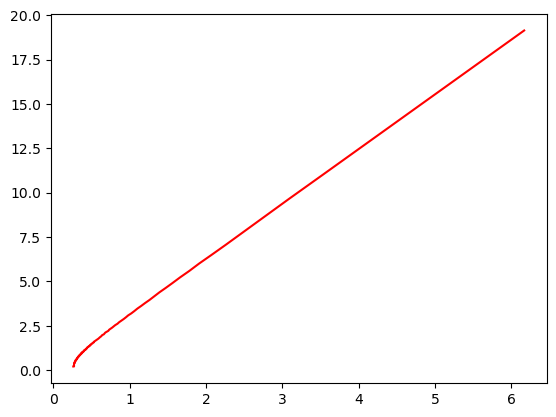

In [64]:
sols = sols[["Return", "Std Deviation"]]
plt.plot(sols["Std Deviation"],sols["Return"], color ='red', label = "EFF Frontier")
plt.show()

### Question 5(3-1) Diversification

b. $\sigma^{2}_{p}$(n) = $\Sigma^{n}_{i=1}$$(1/n)^{2}$*$\Sigma_{ii}$ + $\Sigma^{n}_{i=1}\Sigma^{n}_{j=1}$$(1/n)^{2}$$\Sigma_{ij}$ (for i not equal to j). This becomes <br>(1/n)*(1/n$\Sigma^{n}_{i=1}$) + (n-1)/$n^{2}$ $\Sigma^{n}_{i=1}$(1/(n-1))$\Sigma^{n}_{j=1}$$\Sigma_{ij}$ which becomes 1/n* avg variance + average covariance or 
1/n* $\overline{\sigma}^{2}_{i}$ +$\overline{\sigma}_{ij}$. As n goes to infinity, $\sigma^{2}_{p}$(n) = 0 + $\overline{\sigma}_{ij}$ = 

c. perfect anti-correlation has the highest risk at the return while the perfect correlation has the lowest risk at the return and no correlation lies in the middle.

In [59]:
mu_1 = .05
mu_2 = .1
vol_1 = .05
vol_2 = .15
corr = 1
anti_corr = -1
no_corr = 0 
rho = matrix([[mu_1,mu_2]])
cov = corr*vol_1*vol_2
anti_cov = anti_corr*vol_1*vol_2
no_cov = no_corr*vol_1*vol_2
n= len(rho)
target = rho[0]
cov_matrix = matrix([[vol_1**2,cov],[cov,vol_2**2]])
anti_cov_matrix = matrix([[vol_1**2,anti_cov],[anti_cov,vol_2**2]])
no_cov_matrix = matrix([[vol_1**2,no_cov],[no_cov,vol_2**2]])

In [62]:
A = matrix(1.0,(1,n))
b = matrix(1.0,(1,1)).T
q = matrix(np.zeros((n, 1)))
sol = solvers.qp(cov_matrix*.5,-rho, A=A, b=b)
sol_anti = solvers.qp(anti_cov_matrix*.5,-rho, A=A, b=b)
sol_no = solvers.qp(no_cov_matrix*.5,-rho, A=A, b=b)


In [63]:
print(sol['x'])
print(sol_anti['x'])
print(sol_no['x'])

[-9.39e+00]
[ 9.80e+00]

[ 9.60e+00]
[ 6.53e+00]

[-3.10e+00]
[ 4.10e+00]



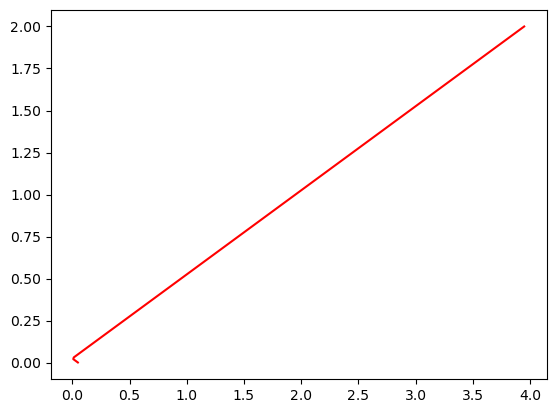

In [77]:
A = matrix(np.c_[np.ones(n), rho]).T
eff_front_rets = np.linspace(0.001,2,200)
eff_front_risk = np.linspace(0.001,0.001,200)
for i in range(0,200):
    target_l = eff_front_rets[i]
    b = matrix(np.c_[np.ones(1),target_l]).T
    sol1 = solvers.qp(cov_matrix,q, A=A, b=b) 
    eff_front_risk[i] = np.sqrt((sol1['x'].T)*cov_matrix*sol1['x'])

plt.plot(eff_front_risk,eff_front_rets, color='red',label="Eff Frontier")
plt.show()

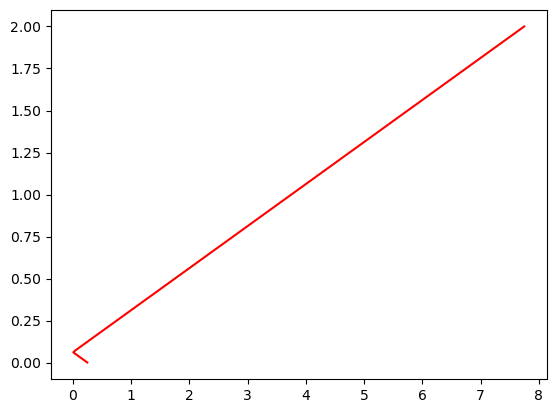

In [78]:
A = matrix(np.c_[np.ones(n), rho]).T
eff_front_rets = np.linspace(0.001,2,200)
eff_front_risk = np.linspace(0.001,0.001,200)
for i in range(0,200):
    target_l = eff_front_rets[i]
    b = matrix(np.c_[np.ones(1),target_l]).T
    sol1 = solvers.qp(anti_cov_matrix,q, A=A, b=b) 
    eff_front_risk[i] = np.sqrt((sol1['x'].T)*anti_cov_matrix*sol1['x'])

plt.plot(eff_front_risk,eff_front_rets, color='red',label="Eff Frontier")
plt.show()

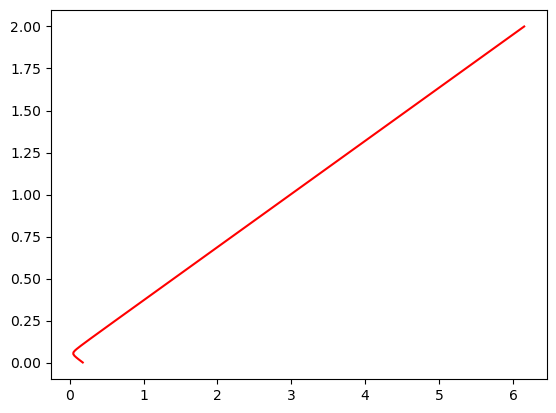

In [79]:
A = matrix(np.c_[np.ones(n), rho]).T
eff_front_rets = np.linspace(0.001,2,200)
eff_front_risk = np.linspace(0.001,0.001,200)
for i in range(0,200):
    target_l = eff_front_rets[i]
    b = matrix(np.c_[np.ones(1),target_l]).T
    sol1 = solvers.qp(no_cov_matrix,q, A=A, b=b) 
    eff_front_risk[i] = np.sqrt((sol1['x'].T)*no_cov_matrix*sol1['x'])

plt.plot(eff_front_risk,eff_front_rets, color='red',label="Eff Frontier")
plt.show()